In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('data/no1_train.csv')
df['start_time'] = pd.to_datetime(df['start_time'])
df.set_index('start_time', inplace=True)
df.head()

,hydro,micro,thermal,wind,river,total,y,sys_reg,flow
start_time,,,,,,,,,
2019-01-09 14:10:00,1591.839,141.928,11.5,74.428,0.0,1819.695,341.330021,10.0,-4417.4
2019-01-09 14:15:00,1591.839,141.928,11.5,74.428,0.0,1819.695,330.114330,10.0,-4417.4
2019-01-09 14:20:00,1591.839,141.928,11.5,74.428,0.0,1819.695,323.877221,10.0,-4417.4
2019-01-09 14:25:00,1591.839,141.928,11.5,74.428,0.0,1819.695,296.438463,10.0,-4417.4
2019-01-09 14:30:00,1591.839,141.928,11.5,74.428,0.0,1819.695,269.097132,10.0,-4417.4


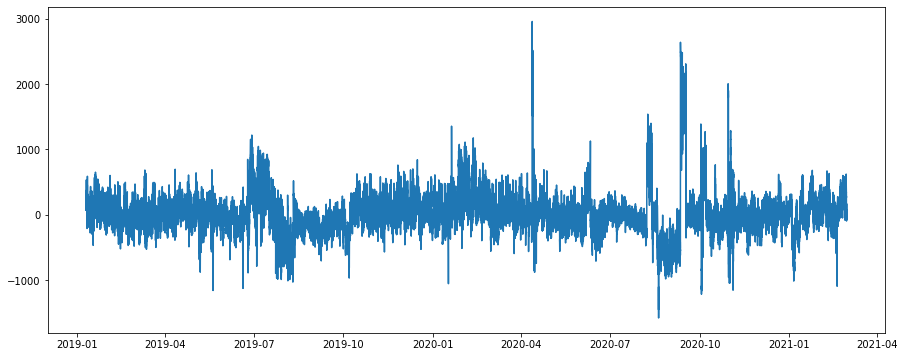

In [53]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.plot(df['y'], label='y')

In [54]:
def preprocess(df):
    for col in df.columns:
        if col == 'y':
            df[col] = df[col].clip(upper=df[col].quantile(0.991))
            df[col] = df[col].clip(lower=df[col].quantile(0.001))
        df[col] = (df[col] - df[col].mean()) / df[col].std()

In [55]:
preprocess(df)

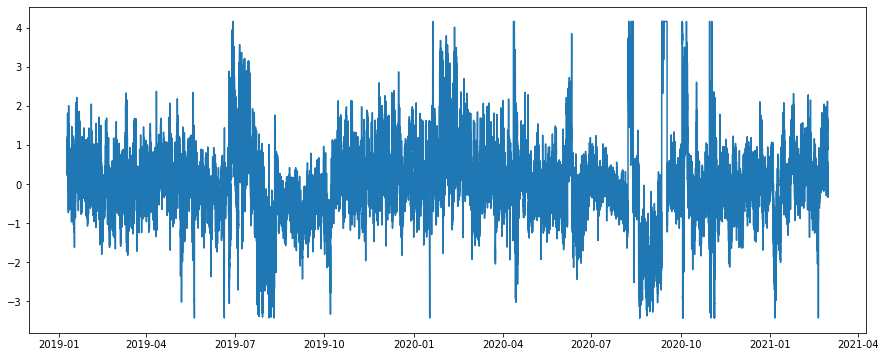

In [56]:
plt.plot(df['y'])